Creating simulated data for Zhen's dynamic fmri study

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


Text(0.5,1,u'A sine wave or two')

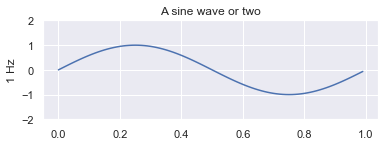

In [21]:
# importing some libraries

import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 1.0, 0.01)
print(t)

fig = plt.figure(1)
ax1 = fig.add_subplot(211)
ax1.plot(t, np.sin(2*np.pi*t))
ax1.grid(True)
ax1.set_ylim((-2, 2))
ax1.set_ylabel('1 Hz')
ax1.set_title('A sine wave or two')

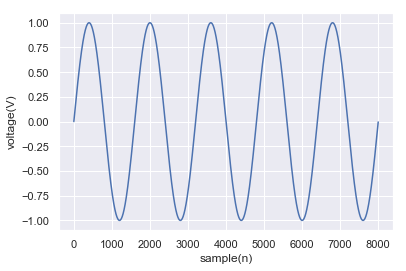

In [22]:
Fs = 8000
f = 5
sample = 8000
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)
plt.plot(x, y)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()

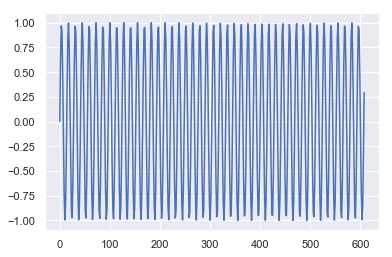

In [30]:
Fs = 1/1.45 # sampling frequency
sample = 420 # number of samples

f1 = 0.05 # frequency of sine wave 1
t = np.arange(sample)/Fs # converting time to seconds 

y = np.sin(2 * np.pi * f1 * t / Fs)
plt.plot(t, y)
#plt.axis([0, 20, -1, 1])


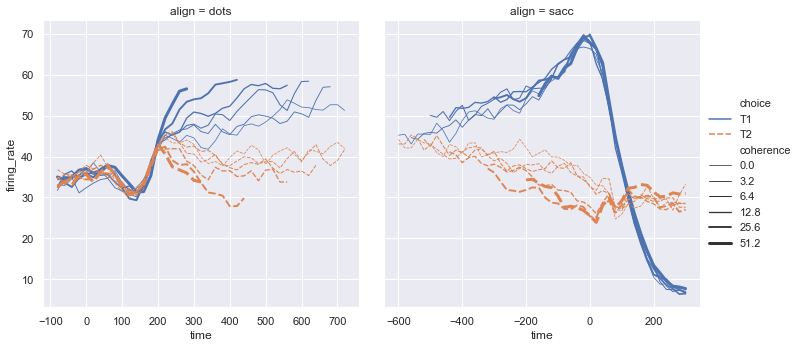

In [2]:
import seaborn as sns
sns.set()
dots = sns.load_dataset("dots")
sns.relplot(x="time", y="firing_rate", col="align",
            hue="choice", size="coherence", style="choice",
            facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots);

In [5]:
print(type(dots))
print(dots)

<class 'pandas.core.frame.DataFrame'>
    align choice  time  coherence  firing_rate
0    dots     T1   -80        0.0    33.189967
1    dots     T1   -80        3.2    31.691726
2    dots     T1   -80        6.4    34.279840
3    dots     T1   -80       12.8    32.631874
4    dots     T1   -80       25.6    35.060487
5    dots     T1   -80       51.2    34.987571
6    dots     T1   -60        0.0    32.868526
7    dots     T1   -60        3.2    35.119048
8    dots     T1   -60        6.4    34.841076
9    dots     T1   -60       12.8    35.648148
10   dots     T1   -60       25.6    33.610568
11   dots     T1   -60       51.2    34.277344
12   dots     T1   -40        0.0    34.561753
13   dots     T1   -40        3.2    34.895833
14   dots     T1   -40        6.4    34.963325
15   dots     T1   -40       12.8    36.471193
16   dots     T1   -40       25.6    32.534247
17   dots     T1   -40       51.2    35.009766
18   dots     T1   -20        0.0    35.358566
19   dots     T1   -20

In [7]:
iris = sns.load_dataset("iris")
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0    